# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#Three Observable Trends from the data in this project:

#As results may vary depending on the random city locations generated, these observations are 
#specific to my latest run through of the following cells:

# 1.) Max temperatures increased the closer they were to 0 latitude,
#    and decreased the farther away they were.
# 2.) Using the correlation coefficient, we see a strong correlation between latitude 
#   and max temperature. The farther from 0 a latitude marker is in a city, 
#   the cooler the max temperature is in a city.
# 3.) Using the correlation coefficient, we see weaker correlations with wind speed,
#    with higher wind speeds found as we get farther away from zero latitude.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import scipy.stats as st

from scipy.stats import linregress
from pprint import pprint

# Import API key - make sure your README file mentions that the user will need to obtain their own keys to properly use this notebook
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

591

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
cities

['amderma',
 'bargal',
 'vardo',
 'coacoyul',
 'arraial do cabo',
 'bambous virieux',
 'tasiilaq',
 'hilo',
 'rikitea',
 'nikel',
 'sioux lookout',
 'san patricio',
 'illoqqortoormiut',
 'port alfred',
 'ushuaia',
 'esperance',
 'avarua',
 'khasan',
 'pisco',
 'rawson',
 'hermanus',
 'new norfolk',
 'port elizabeth',
 'punta arenas',
 'dikson',
 'pangnirtung',
 'lebu',
 'airai',
 'hambantota',
 'kahului',
 'torbay',
 'voyvozh',
 'hobart',
 'belushya guba',
 'longyearbyen',
 'kieta',
 'wawa',
 'nandu',
 'busselton',
 'tukrah',
 'dingle',
 'redmond',
 'severo-kurilsk',
 'barrow',
 'necochea',
 'gurgan',
 'chokurdakh',
 'lima',
 'jujuy',
 'garowe',
 'amapa',
 'margate',
 'sur',
 'luis correia',
 'kourou',
 'honiara',
 'impfondo',
 'ardistan',
 'naryan-mar',
 'palabuhanratu',
 'nikolskoye',
 'toliary',
 'katsuura',
 'cape town',
 'utiroa',
 'mitsamiouli',
 'taolanaro',
 'berlevag',
 'puerto ayora',
 'burica',
 'swan hill',
 'mataura',
 'ixtapa',
 'los llanos de aridane',
 'acuna',
 'port-c

In [5]:
one_city_stats = pd.DataFrame(columns=['City','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date'])

In [6]:
#testing my connection to Open Weather API with a single city:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# city='victoria'

single_query_url =  base_url + "appid=" + weather_api_key + "&q=" + city + '&units=imperial'
single_weather_response = requests.get(single_query_url).json()
single_weather_response

single_city = single_weather_response['name']
city_lat = single_weather_response['coord']['lat']
city_lon = single_weather_response['coord']['lon']
temp_max = single_weather_response['main']['temp_max']
humidity = single_weather_response['main']['humidity']
cloudiness = single_weather_response['clouds']['all']
wind_speed = single_weather_response['wind']['speed']
country = single_weather_response['sys']['country']
date = single_weather_response['dt']

city_stats = [single_city, city_lat, city_lon, temp_max, humidity, cloudiness,
                  wind_speed, country,date]
print(city_stats)

one_city_stats = one_city_stats.append({
    'City':single_city,
    'Lat':city_lat,
    'Lng':city_lon,
    'Max Temp':temp_max,
    'Humidity':humidity,
    'Cloudiness':cloudiness,
    'Wind Speed':wind_speed,
    'Country':country,
    'Date':date
},ignore_index=True)

['Northam', 51.0333, -4.2167, 59.61, 92, 100, 22.86, 'GB', 1666736636]


In [7]:
type(single_weather_response)

dict

In [8]:
one_city_stats.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Northam,51.0333,-4.2167,59.61,92,100,22.86,GB,1666736636


In [9]:
query_url =  base_url + "appid=" + weather_api_key + "&q=" + city + '&units=imperial'
weather1_json = requests.get(query_url).json()
weather1_json

{'coord': {'lon': -4.2167, 'lat': 51.0333},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 58.66,
  'feels_like': 58.55,
  'temp_min': 54.66,
  'temp_max': 59.61,
  'pressure': 1002,
  'humidity': 92,
  'sea_level': 1002,
  'grnd_level': 995},
 'visibility': 10000,
 'wind': {'speed': 22.86, 'deg': 162, 'gust': 37.76},
 'clouds': {'all': 100},
 'dt': 1666736636,
 'sys': {'type': 2,
  'id': 2005965,
  'country': 'GB',
  'sunrise': 1666680997,
  'sunset': 1666717502},
 'timezone': 3600,
 'id': 2641434,
 'name': 'Northam',
 'cod': 200}

In [10]:
#Perform the weather check on each city using a for loop:

# base_url = "https://api.openweathermap.org/data/2.5/weather?"
# url order = url + appid + city + units


#create lists to hold the city names to print 
city_json = []
weather_report = []

for city in cities:
    #include try/except to account for cities not found
    try:
        query_url =  base_url + "appid=" + weather_api_key + "&q=" + city + '&units=imperial'
        weather_json = requests.get(query_url).json()              
        weather_report.append(weather_json)
        #must have below code to fulfil homework city print out requirement
        city_json.append(weather_json['name'])
    except KeyError:
        city_json.append("City not found. Skipping...")
        weather_report.append("City not found. Skipping...")

print("Beginning Data Retrieval:")
print("------------------------")
for x in range(len(city_json)):
    print(f'Processing City {x} | {city_json[x]}')


Beginning Data Retrieval:
------------------------
Processing City 0 | City not found. Skipping...
Processing City 1 | City not found. Skipping...
Processing City 2 | Vardø
Processing City 3 | Coacoyul
Processing City 4 | Arraial do Cabo
Processing City 5 | Bambous Virieux
Processing City 6 | Tasiilaq
Processing City 7 | Hilo
Processing City 8 | Rikitea
Processing City 9 | Nikel
Processing City 10 | Sioux Lookout
Processing City 11 | San Patricio
Processing City 12 | City not found. Skipping...
Processing City 13 | Port Alfred
Processing City 14 | Ushuaia
Processing City 15 | Esperance
Processing City 16 | Avarua
Processing City 17 | Khasan
Processing City 18 | Pisco
Processing City 19 | Rawson
Processing City 20 | Hermanus
Processing City 21 | New Norfolk
Processing City 22 | Port Elizabeth
Processing City 23 | Punta Arenas
Processing City 24 | Dikson
Processing City 25 | Pangnirtung
Processing City 26 | Lebu
Processing City 27 | Airai
Processing City 28 | Hambantota
Processing City 2

In [11]:
#build the data frame before the for loop
city_w_df = pd.DataFrame(columns=['City','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date'])

for city in cities:
    try:
        query_url =  base_url + "appid=" + weather_api_key + "&q=" + city + '&units=imperial'
        weather_json = requests.get(query_url).json()  
#variables for the dataframe
        city_name = weather_json['name']
        city_lat = weather_json['coord']['lat']
        city_lon = weather_json['coord']['lon']
        temp_max = weather_json['main']['temp_max']
        humidity = weather_json['main']['humidity']
        cloudiness = weather_json['clouds']['all']
        wind_speed = weather_json['wind']['speed']
        country = weather_json['sys']['country']
        date = weather_json['dt']

#connecting the columns with the variables for our dataframe
        city_w_df = city_w_df.append({
        'City':city_name,
        'Lat':city_lat,
        'Lng':city_lon,
        'Max Temp':temp_max,
        'Humidity':humidity,
        'Cloudiness':cloudiness,
        'Wind Speed':wind_speed,
        'Country':country,
        'Date':date
        },ignore_index=True)
    except KeyError:
        print('not found')
    
city_w_df.head(20)

not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vardø,70.3705,31.1107,31.98,80,100,20.71,NO,1666736798
1,Coacoyul,17.8058,-99.1100,79.30,59,84,1.63,MX,1666736798
2,Arraial do Cabo,-22.9661,-42.0278,73.36,78,75,4.61,BR,1666736798
3,Bambous Virieux,-20.3428,57.7575,73.22,78,40,9.22,MU,1666736799
4,Tasiilaq,65.6145,-37.6368,32.16,96,100,4.18,GL,1666736799
5,Hilo,19.7297,-155.0900,82.13,76,75,13.00,US,1666736799
6,Rikitea,-23.1203,-134.9692,73.20,74,55,17.78,PF,1666736638
7,Nikel,69.4128,30.2220,28.58,90,100,11.61,RU,1666736800
8,Sioux Lookout,50.1001,-91.9170,35.67,69,75,14.97,CA,1666736800
9,San Patricio,28.0170,-97.5169,78.75,20,0,8.97,US,1666736262


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
#export to .csv
city_w_df.to_csv(output_data_file,
                  encoding="utf-8", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
#inspect the column types to make sure they are formatted correctly
city_w_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity       object
Cloudiness     object
Wind Speed    float64
Country        object
Date           object
dtype: object

In [14]:
# reformatting some columns from object to numeric

city_w_df['Humidity'] = pd.to_numeric(city_w_df['Humidity'])
city_w_df['Cloudiness'] = pd.to_numeric(city_w_df['Cloudiness'])
city_w_df['Date'] = pd.to_numeric(city_w_df['Date'])

In [15]:
city_w_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

In [16]:
#inspect the data
city_w_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,5.390000e+02
mean,18.771327,18.202426,60.133896,72.790353,60.901670,7.582931,1.666737e+09
std,33.682368,89.508874,21.168760,20.043786,39.097861,5.207146,1.278328e+02
min,-54.800000,-179.166700,-6.140000,12.000000,0.000000,0.000000,1.666736e+09
25%,-9.048750,-60.083850,47.995000,63.000000,20.000000,3.770000,1.666737e+09
50%,20.516900,23.242000,65.340000,78.000000,75.000000,6.400000,1.666737e+09
75%,48.558300,100.403000,77.165000,88.000000,100.000000,10.360000,1.666737e+09
max,78.218600,179.316700,93.020000,100.000000,100.000000,29.910000,1.666737e+09


In [17]:
low_humidity_df = city_w_df.loc[city_w_df['Humidity']<100,:]
low_humidity_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vardø,70.3705,31.1107,31.98,80,100,20.71,NO,1666736798
1,Coacoyul,17.8058,-99.1100,79.30,59,84,1.63,MX,1666736798
2,Arraial do Cabo,-22.9661,-42.0278,73.36,78,75,4.61,BR,1666736798
3,Bambous Virieux,-20.3428,57.7575,73.22,78,40,9.22,MU,1666736799
4,Tasiilaq,65.6145,-37.6368,32.16,96,100,4.18,GL,1666736799
...,...,...,...,...,...,...,...,...,...
534,Tarauacá,-8.1614,-70.7656,86.56,60,39,1.63,BR,1666736786
535,Anlu,31.1661,112.5831,57.92,82,100,6.60,CN,1666736797
536,Novikovo,51.1537,37.8879,47.68,88,100,8.08,RU,1666736797
537,Kondinskoye,59.6481,67.4100,28.36,91,11,5.23,RU,1666736529


In [18]:
#  Get the indices of cities that have humidity over 100%.
high_humidity = city_w_df.loc[city_w_df['Humidity']>100,:]
high_humidity.index

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_w_df.drop(index=high_humidity.index)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vardø,70.3705,31.1107,31.98,80,100,20.71,NO,1666736798
1,Coacoyul,17.8058,-99.1100,79.30,59,84,1.63,MX,1666736798
2,Arraial do Cabo,-22.9661,-42.0278,73.36,78,75,4.61,BR,1666736798
3,Bambous Virieux,-20.3428,57.7575,73.22,78,40,9.22,MU,1666736799
4,Tasiilaq,65.6145,-37.6368,32.16,96,100,4.18,GL,1666736799
...,...,...,...,...,...,...,...,...,...
534,Tarauacá,-8.1614,-70.7656,86.56,60,39,1.63,BR,1666736786
535,Anlu,31.1661,112.5831,57.92,82,100,6.60,CN,1666736797
536,Novikovo,51.1537,37.8879,47.68,88,100,8.08,RU,1666736797
537,Kondinskoye,59.6481,67.4100,28.36,91,11,5.23,RU,1666736529


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [20]:
todays_date =pd.to_datetime("today").strftime("%m/%d/%Y")

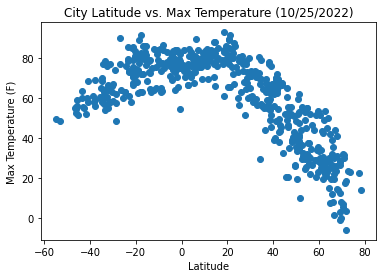

In [21]:
#City Latitude vs. Max Temperature Plot:
plt.scatter(clean_city_data['Lat'],clean_city_data['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature ({todays_date})')
plt.savefig("Images/Lat_v_Temp.png")
plt.show()

## Latitude vs. Humidity Plot

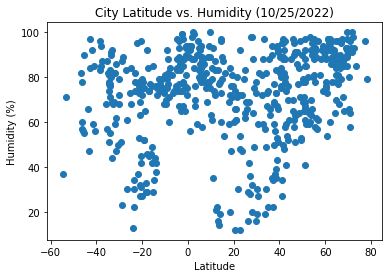

In [22]:
#City Latitude vs. Humidity Plot:
plt.scatter(clean_city_data['Lat'],clean_city_data['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({todays_date})')
plt.savefig("Images/Lat_v_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

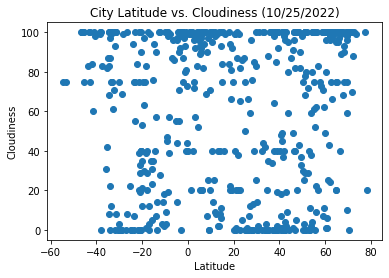

In [23]:
#City Latitude vs. Cloudiness Plot:
plt.scatter(clean_city_data['Lat'],clean_city_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'City Latitude vs. Cloudiness ({todays_date})')
plt.savefig("Images/Lat_v_Clouds.png")
plt.show()

## Latitude vs. Wind Speed Plot

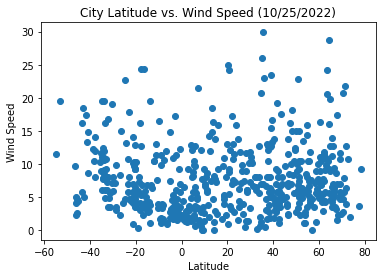

In [24]:
#City Latitude vs. Wind Speed Plot:
plt.scatter(clean_city_data['Lat'],clean_city_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'City Latitude vs. Wind Speed ({todays_date})')
plt.savefig("Images/Lat_v_Wind.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [25]:
#isolate hemisphere locations:
northern_lat = clean_city_data.loc[clean_city_data['Lat']>0,:]
southern_lat = clean_city_data.loc[clean_city_data['Lat']<0,:]

The r value is -0.8736185018518929


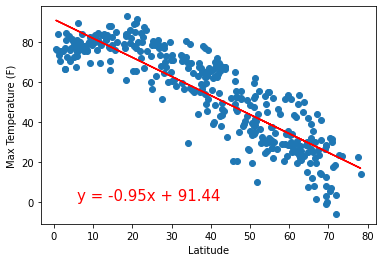

In [26]:
#plot chart
x_values = northern_lat['Lat']
y_values = northern_lat['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#create the equation y=mx+b:
regress_values = x_values * slope + intercept

#this is all formatting, adding the line to our plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

print(f'The r value is {st.pearsonr(y_values,x_values)[0]}')
plt.savefig("Images/LR_NH_Temp_v_Lat.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
x_values = southern_lat['Lat']
y_values = southern_lat['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#create the equation y=mx+b:
regress_values = x_values * slope + intercept

#this is all formatting, adding the line to our plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

print(f'The r value is {st.pearsonr(y_values,x_values)[0]}')
plt.savefig("Images/LR_SH_Temp_v_Lat.png")
plt.show()

The r value is 0.6546603221267192


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x_values = northern_lat['Lat']
y_values = northern_lat['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#create the equation y=mx+b:
regress_values = x_values * slope + intercept

#this is all formatting, adding the line to our plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

print(f'The r value is {st.pearsonr(y_values,x_values)[0]}')
plt.savefig("Images/LR_NH_Humidity_v_Lat.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x_values = southern_lat['Lat']
y_values = southern_lat['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#create the equation y=mx+b:
regress_values = x_values * slope + intercept

#this is all formatting, adding the line to our plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

print(f'The r value is {st.pearsonr(y_values,x_values)[0]}')
plt.savefig("Images/LR_SH_Humidity_v_Lat.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = northern_lat['Lat']
y_values = northern_lat['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#create the equation y=mx+b:
regress_values = x_values * slope + intercept

#this is all formatting, adding the line to our plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

print(f'The r value is {st.pearsonr(y_values,x_values)[0]}')
plt.savefig("Images/LR_NH_Clouds_v_Lat.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = southern_lat['Lat']
y_values = southern_lat['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#create the equation y=mx+b:
regress_values = x_values * slope + intercept

#this is all formatting, adding the line to our plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,20),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

print(f'The r value is {st.pearsonr(y_values,x_values)[0]}')
plt.savefig("Images/LR_SH_Clouds_v_Lat.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = northern_lat['Lat']
y_values = northern_lat['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#create the equation y=mx+b:
regress_values = x_values * slope + intercept

#this is all formatting, adding the line to our plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f'The r value is {st.pearsonr(y_values,x_values)[0]}')
plt.savefig("Images/LR_NH_Wind_v_Lat.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = southern_lat['Lat']
y_values = southern_lat['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#create the equation y=mx+b:
regress_values = x_values * slope + intercept

#this is all formatting, adding the line to our plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,1),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f'The r value is {st.pearsonr(y_values,x_values)[0]}')
plt.savefig("Images/LR_SH_Wind_v_Lat.png")
plt.show()